NAMA : MUHAMMAD FAUZAN

NIM : 4222201050

KELAS : Pagi B

# Prediksi Gaji Karyawan XYZ

Google Colab Notebook lengkap dari EDA, Feature Engineering, hingga Evaluasi Model.

In [ ]:
# 2. Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
train = pd.read_csv('dataset_karyawan_missing.csv')
train.head(15)

,ID,Nama,Departemen,Gaji,Usia,Lama_Kerja,Status_Karyawan
0,1,Citra,NaN,5744870.0,53,9,Kontrak
1,2,Eka,HRD,5862014.0,39,9,Tetap
2,3,Citra,HRD,4894992.0,55,16,Tetap
3,4,Budi,QC,4606286.0,51,2,Kontrak
4,5,Dewi,HRD,4199766.0,44,7,Kontrak
5,6,Citra,Produksi,5139075.0,41,22,Kontrak
6,7,Dewi,QC,3651198.0,44,16,Kontrak
7,8,Budi,Produksi,5571161.0,29,19,Kontrak
8,9,Budi,NaN,5033255.0,35,6,Tetap
9,10,Andi,Logistik,5212685.0,44,20,Tetap


In [ ]:
# 3. Load Dataset
df = pd.read_csv('dataset_karyawan_missing.csv')
df.head()

,ID,Nama,Departemen,Gaji,Usia,Lama_Kerja,Status_Karyawan
0,1,Citra,NaN,5744870.0,53,9,Kontrak
1,2,Eka,HRD,5862014.0,39,9,Tetap
2,3,Citra,HRD,4894992.0,55,16,Tetap
3,4,Budi,QC,4606286.0,51,2,Kontrak
4,5,Dewi,HRD,4199766.0,44,7,Kontrak


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   Nama             200 non-null    object 
 2   Departemen       190 non-null    object 
 3   Gaji             190 non-null    float64
 4   Usia             200 non-null    int64  
 5   Lama_Kerja       200 non-null    int64  
 6   Status_Karyawan  200 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB
None

Statistik deskriptif:
                ID  Nama Departemen          Gaji        Usia  Lama_Kerja  \
count   200.000000   200        190  1.900000e+02  200.000000  200.000000   
unique         NaN     5          4           NaN         NaN         NaN   
top            NaN  Dewi        HRD           NaN         NaN         NaN   
freq           NaN    50         56           NaN         NaN         NaN   
mean  

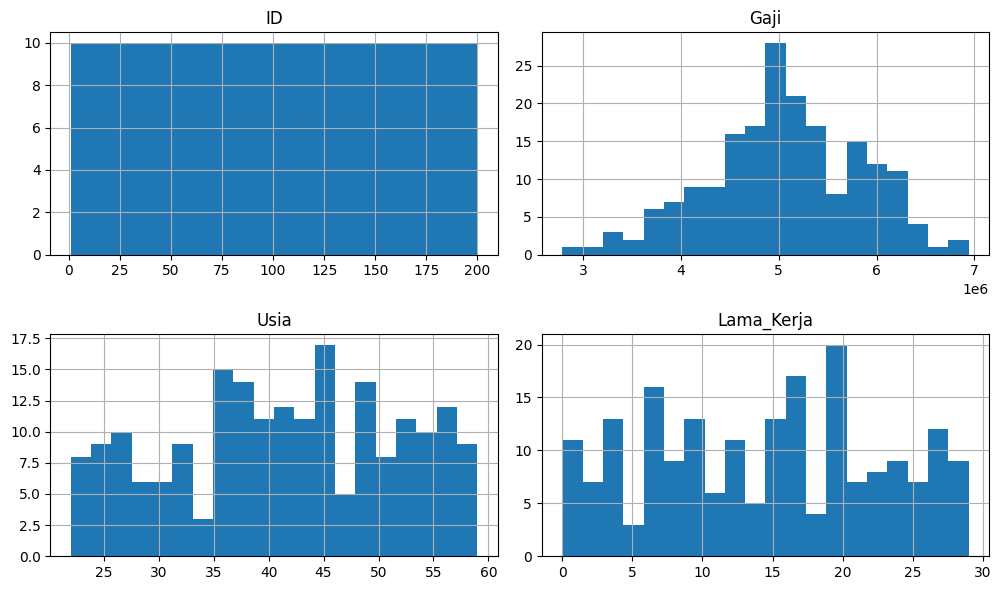

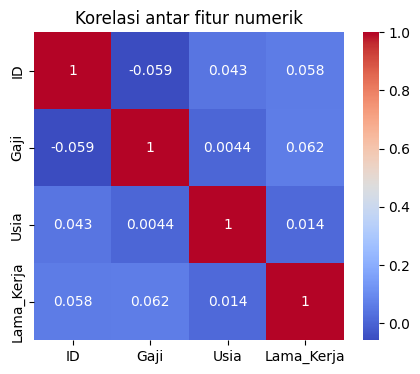

In [ ]:
# 4. EDA
print(df.info())
print("\nStatistik deskriptif:")
print(df.describe(include='all'))
print("\nJumlah missing values:")
print(df.isnull().sum())
df.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur numerik")
plt.show()

In [ ]:
# 5. Feature Engineering
df['Departemen'] = df['Departemen'].str.strip().str.lower()
df['rasio_usia_kerja'] = df['Usia'] / (df['Lama_Kerja'] + 1)
df.head()

,ID,Nama,Departemen,Gaji,Usia,Lama_Kerja,Status_Karyawan,rasio_usia_kerja
0,1,Citra,NaN,5744870.0,53,9,Kontrak,5.300000
1,2,Eka,hrd,5862014.0,39,9,Tetap,3.900000
2,3,Citra,hrd,4894992.0,55,16,Tetap,3.235294
3,4,Budi,qc,4606286.0,51,2,Kontrak,17.000000
4,5,Dewi,hrd,4199766.0,44,7,Kontrak,5.500000


# **Peran Feature Engineering dalam Pemodelan Machine Learning**

Feature Engineering adalah proses yang sangat penting dalam pemodelan machine learning. Tujuan utama dari feature engineering adalah untuk menciptakan fitur-fitur yang lebih baik dan lebih relevan bagi model, yang bisa meningkatkan performa dan akurasi model, di antaranya :

1. Mengatasi Data Tidak Terstruktur atau Tidak Lengkap:

Data kotor atau missing values yang ada di dalam dataset seringkali membuat model machine learning kesulitan untuk mengidentifikasi pola yang relevan. Feature engineering membantu dengan membersihkan dan mengisi kekosongan.

2. Meningkatkan Kualitas Prediksi:

Dengan fitur yang lebih baik dan relevan, model dapat belajar dengan lebih efektif, sehingga prediksinya akan lebih akurat.

# **# Contoh Feature Engineering dari Kasus:**

1. **Membersihkan Kolom departemen**:

**Masalah**: Data di kolom departemen mungkin tidak konsisten, ada spasi ekstra atau variasi dalam penulisan (misalnya "HR" vs "hr").

**Feature Engineering:**
Dengan df['departemen'].str.strip().str.lower(), kita membersihkan data dengan menghapus spasi dan mengubah semuanya menjadi huruf kecil. Hal ini penting agar model tidak melihat "HR" dan "hr" sebagai dua entitas yang berbeda, melainkan satu.

**Manfaat:** Ini memastikan bahwa model melihat semua kategori departemen sebagai variabel yang konsisten, tanpa gangguan dari masalah penulisan atau format.

2. **Menghitung rasio_usia_kerja:**

**Masalah:** Kolom usia dan lama_bekerja memiliki hubungan yang mungkin relevan dengan gaji. Misalnya, seseorang dengan usia lebih tua dan pengalaman lebih banyak mungkin memiliki gaji yang lebih tinggi.

**Feature Engineering:** Membuat fitur baru rasio_usia_kerja dengan rumus usia / (lama_bekerja + 1). Rasio ini memberi gambaran seberapa efisien seseorang dalam hal pengalaman kerja dibandingkan dengan usia mereka.

**Manfaat:** Dengan fitur ini, model dapat menangkap pola yang lebih kompleks, seperti karyawan dengan pengalaman lebih banyak di usia yang lebih muda yang mungkin menunjukkan karir yang berkembang dengan cepat.

3. **Menangani Nilai Missing (NaN):**

**Masalah:** Kolom-kolom seperti lama_bekerja atau usia mungkin memiliki nilai missing (NaN) yang akan mengganggu pemodelan.

**Feature Engineering:** Menggunakan fillna() untuk mengganti nilai NaN, misalnya dengan rata-rata untuk kolom usia dan 0 untuk lama_bekerja (yang masuk akal jika karyawan baru).

**Manfaat**: Dengan mengisi nilai yang hilang, model dapat belajar dari data yang lebih lengkap tanpa harus menghadapi error atau bias karena nilai kosong.


In [ ]:
# 6. Handling Outlier dengan IQR
def hapus_outlier_iqr(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    before = df.shape[0]
    df_bersih = df[(df[kolom] >= batas_bawah) & (df[kolom] <= batas_atas)]
    after = df_bersih.shape[0]
    print(f"[{kolom}] Data dibuang: {before - after}")
    return df_bersih

for kolom in ['Usia', 'Lama_Kerja', 'Gaji']:
    df = hapus_outlier_iqr(df, kolom)
print("Jumlah data akhir setelah buang outlier:", df.shape)

[Usia] Data dibuang: 0
[Lama_Kerja] Data dibuang: 0
[Gaji] Data dibuang: 12
Jumlah data akhir setelah buang outlier: (188, 8)


In [ ]:
# 7. Preprocessing
X = df.drop("Gaji", axis=1)
y = df["Gaji"]
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

In [ ]:
# 8. Modeling
model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['ID', 'Usia', 'Lama_Kerja',
                                                   'rasio_usia_kerja']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Nama', 'Departemen',
                                                   'Status_Karyawan'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# 9. Evaluasi
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R^2  : {r2:.2f}")

MAE  : 618798.80
RMSE : 790324.01
R^2  : -0.20


# Apa itu Metrik Evaluasi jika di lihat dari studi kasus masing masing?
Dari kasus prediksi gaji karyawan matrik evaluasi regresi akan digunakan untuk menilai seberapa baik model yang kita buat dalam memprediksi gaji karyawan. Matriks ini membantu kita untuk mengukur kesalahan antara gaji yang diprediksi dan gaji yang sebenarnya.

Hasil yang Diperoleh:
MAE: 618,798.80

MAE menunjukkan rata-rata kesalahan absolut antara nilai prediksi dan nilai asli. Artinya, rata-rata kesalahan prediksi gaji adalah sekitar 618.8 ribu IDR. Nilai MAE yang cukup besar ini berarti model memiliki kesalahan yang signifikan dalam prediksi.

RMSE: 790,324.01

RMSE memberikan gambaran tentang kesalahan dalam satuan yang sama dengan data (IDR).

R²: -0.20

R² menggambarkan seberapa baik model dalam menjelaskan variasi data.

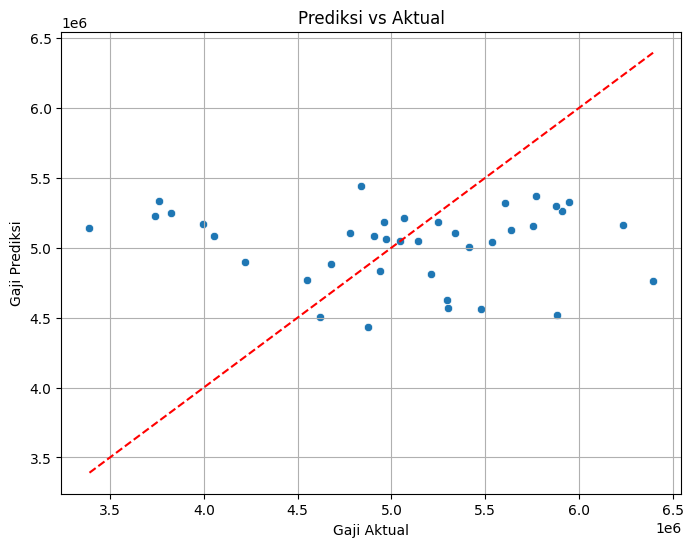

In [ ]:
# 10. Visualisasi Prediksi vs Aktual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Gaji Aktual")
plt.ylabel("Gaji Prediksi")
plt.title("Prediksi vs Aktual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()